<a href="https://colab.research.google.com/github/b-richins92/Cancer_Prediction/blob/main/models_with_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 M

In [ ]:
import pycaret
pycaret.__version__


'3.3.2'

In [ ]:
import os
import requests
from zipfile import ZipFile
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

Loading the prepocessed dataset

In [ ]:
data = pd.read_csv('clean_df.csv')

In [ ]:
data.columns

Index(['Gender', 'Num of Bad Mental Health Days', 'Could Afford Doctor',
       'Years Since Last Checkup', 'Exercise in Past 30 Days',
       'Hours of Sleeping', 'Heart Attack', 'Heart Disease', 'Stroke',
       'Asthma', 'Cancer', 'Depression', 'Kidney Disease', 'Arthritis',
       'Diabetes', 'Married', 'Deaf', 'Blind', 'Mammogram', 'Smoked 100',
       'Smokeless Tobacco', 'Cigarettes per Day', 'CT Scan', 'CT for Cancer',
       'Drinks per Session', 'Flu Vaccine', 'Pneumonia Vaccine',
       'Tetanus Last 10 Years', 'Had COVID', 'Metropolitan',
       'Weight in Pounds', 'Height in Inches', 'Insulin',
       'General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good',
       'Ethnicity_American Indian and Alaskan Native',
       'Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic',
       'Ethnicity_White', 'Education_attended_coll

In [ ]:
data = data.drop(['General Health_Excellent', 'General Health_Fair',
       'General Health_Good', 'General Health_Poor',
       'General Health_Very good', 'CT Scan', 'CT for Cancer'], axis=1)

In [ ]:
data.columns

Index(['Gender', 'Num of Bad Mental Health Days', 'Could Afford Doctor',
       'Years Since Last Checkup', 'Exercise in Past 30 Days',
       'Hours of Sleeping', 'Heart Attack', 'Heart Disease', 'Stroke',
       'Asthma', 'Cancer', 'Depression', 'Kidney Disease', 'Arthritis',
       'Diabetes', 'Married', 'Deaf', 'Blind', 'Mammogram', 'Smoked 100',
       'Smokeless Tobacco', 'Cigarettes per Day', 'Drinks per Session',
       'Flu Vaccine', 'Pneumonia Vaccine', 'Tetanus Last 10 Years',
       'Had COVID', 'Metropolitan', 'Weight in Pounds', 'Height in Inches',
       'Insulin', 'Ethnicity_American Indian and Alaskan Native',
       'Ethnicity_Asian and Pacific Islander', 'Ethnicity_Black',
       'Ethnicity_Hispanic', 'Ethnicity_Multiracial, non-Hispanic',
       'Ethnicity_White', 'Education_attended_college',
       'Education_did_not_graduate_high_school', 'Education_graduated_college',
       'Education_graduated_high_school', 'BMI Category_normal_weight',
       'BMI Category_ob

In [ ]:
data = data.dropna()

In [ ]:
#data.isnull().sum()

In [ ]:
X= data.drop('Cancer', axis=1)
y=data.Cancer

X_train, X_test, y_train, y_test = train_test_split(X,y)

smote=SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [ ]:
from pycaret.classification import *
s = setup(X_train, target= y_train, session_id = 123)


,Description,Value
0,Session id,123
1,Target,Cancer
2,Target type,Binary
3,Original data shape,"(143030, 45)"
4,Transformed data shape,"(143030, 45)"
5,Transformed train set shape,"(100121, 45)"
6,Transformed test set shape,"(42909, 45)"
7,Numeric features,30
8,Categorical features,14
9,Preprocess,True


In [ ]:
best = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9343,0.9662,0.8737,0.9943,0.9301,0.8686,0.8751,20.0170
lightgbm,Light Gradient Boosting Machine,0.9343,0.9655,0.8694,0.9991,0.9298,0.8686,0.8761,16.8050
et,Extra Trees Classifier,0.9329,0.9699,0.8845,0.9793,0.9295,0.8659,0.8700,26.6500
xgboost,Extreme Gradient Boosting,0.9319,0.9632,0.8691,0.9940,0.9274,0.8639,0.8708,4.7060
gbc,Gradient Boosting Classifier,0.9318,0.9634,0.8641,0.9995,0.9269,0.8637,0.8717,34.7820
ada,Ada Boost Classifier,0.9199,0.9593,0.8630,0.9739,0.9151,0.8398,0.8453,8.5740
dt,Decision Tree Classifier,0.8819,0.8819,0.8939,0.8729,0.8833,0.7637,0.7640,1.5270
knn,K Neighbors Classifier,0.7627,0.8989,0.9829,0.6824,0.8056,0.5255,0.5853,13.7440
ridge,Ridge Classifier,0.6941,0.7484,0.7248,0.6828,0.7032,0.3881,0.3889,0.6690
lda,Linear Discriminant Analysis,0.6940,0.7484,0.7248,0.6828,0.7032,0.3881,0.3888,1.2760


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

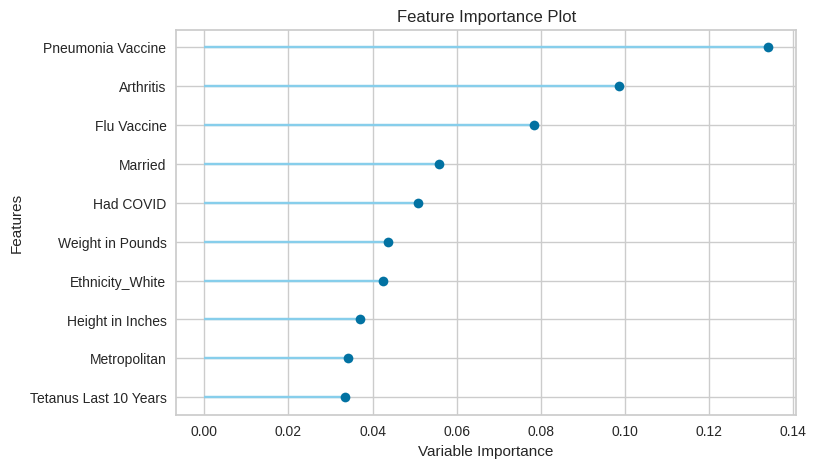

In [ ]:
selected_model = best[0]

# Plot the feature importance of the selected model
plot_model(selected_model, plot='feature')


In [ ]:
print(best)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0), ExtraTreesCla

In [ ]:
evaluate_model(selected_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…